In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve
# from sklearn.inspection import DecisionBoundaryDisplay
# no funciona en Colab

In [2]:
# Plot umbral de decisión
# X: elementos de entrada
# y: valores de etiquetado de salida
# plot_step
def predict_boundary(X,y,plot_step,plot_colors,model,x_label,y_label):
  plt.figure(figsize = (10,10))
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
  
  # predicción del modelo
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
  
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  # plot datos de entrenamiento
  for i, color in zip(range(n_classes), plot_colors):
      idx = np.where(y == i)
      plt.scatter( X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
          cmap=plt.cm.RdYlBu,
          edgecolor="black",
          s=40,)
  plt.show()
  return


# Analisis de datos

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
iris = datasets.load_iris()
X = iris.data 
Y = iris.target


In [5]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df2 = pd.DataFrame(iris.target, columns = ['target'])
df2.head()

,target
0,0
1,0
2,0
3,0
4,0


In [7]:
df3 = pd.concat([df,df2], axis=1)
df3

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df3.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


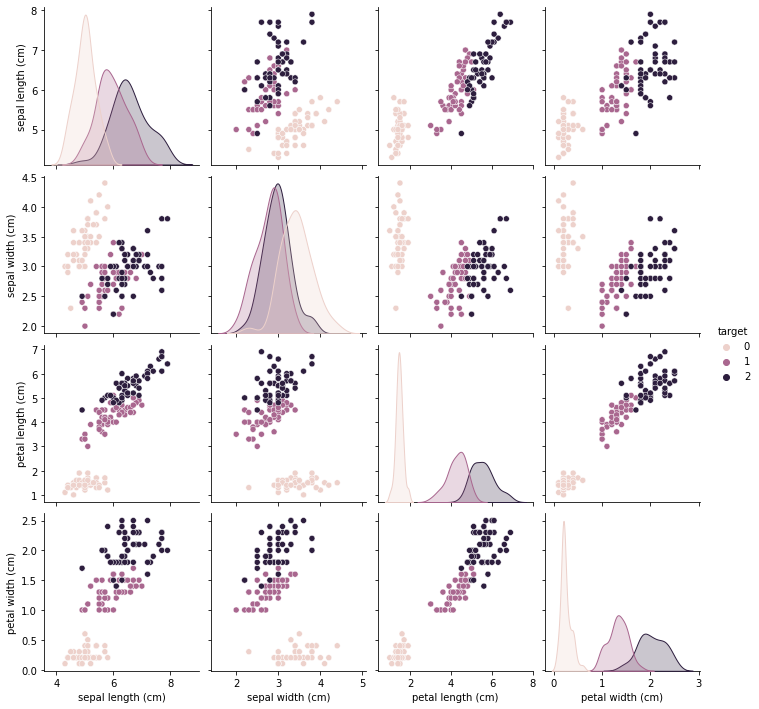

In [9]:
sns.pairplot(df3, hue='target' )
plt.show()

# selección de caracteristicas

https://scikit-learn.org/stable/modules/feature_selection.html


In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# prueba chi-cuadrada compara modelo con observaciones, datos aleatrios, mutuamente exclusivos

In [11]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, Y)

In [12]:
X_new[0,:]

array([1.4, 0.2])

In [13]:
X[0,:]

array([5.1, 3.5, 1.4, 0.2])

In [14]:
best =  SelectKBest(chi2, k=2).fit(X,Y)
best.get_feature_names_out(input_features=iris.feature_names)

AttributeError: 'SelectKBest' object has no attribute 'get_feature_names_out'

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
X = X[:,2:4]

# SVM

In [17]:
from sklearn.svm import SVC

In [18]:
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
x_label = iris.feature_names[2]
y_label = iris.feature_names[3]

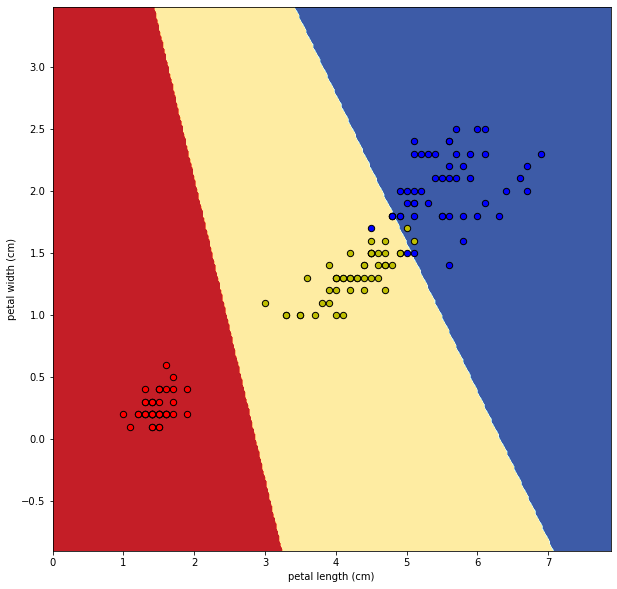

combinacion [2, 3]
la probabilidad de acierto 

96.0


In [19]:
SVM = SVC(degree=1, kernel="poly",probability=True)
SVM.fit(X,Y)

predict_boundary(X, Y, plot_step, plot_colors, SVM, x_label, y_label)
predic = SVM.predict(X)
print('combinacion',[2,3])
print('la probabilidad de acierto \n')
print((np.sum(predic == Y)/len(predic))*100)

# Metrica

In [20]:
pd.crosstab(Y, predic, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,50,0,0,50
1,0,48,2,50
2,0,4,46,50
All,50,52,48,150


In [21]:
print(classification_report(Y, predic))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [22]:
accuracy_score(Y, predic)

0.96

In [23]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
roc_curve(Y, predic, pos_label=2)
fpr, tpr, _ = roc_curve(Y, predic, pos_label=2)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [24]:
roc_curve(Y, predic, pos_label=2)

(array([0.  , 0.02, 0.5 , 1.  ]),
 array([0.  , 0.92, 1.  , 1.  ]),
 array([3, 2, 1, 0]))

In [25]:
fpr, tpr, _ = roc_curve(Y, predic, pos_label=2)

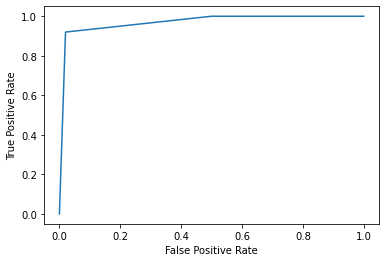

In [26]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [27]:
roc_auc_score(Y, SVM.predict_proba(X), multi_class='ovr')

0.997

#RANDOM FOREST

In [28]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(max_depth=2)
RFC.fit(X,Y)
predic = RFC.predict(X)
accuracy_score(Y, predic)

In [29]:
RFC = RandomForestClassifier(max_depth=2)

In [30]:
RFC.fit(X,Y)

RandomForestClassifier(max_depth=2)

In [31]:
predic = RFC.predict(X)

In [32]:
accuracy_score(Y, predic)

0.9533333333333334

In [33]:
pd.crosstab(Y, predic, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,50,0,0,50
1,0,47,3,50
2,0,4,46,50
All,50,51,49,150


In [34]:
print(classification_report(Y, predic))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [35]:
from sklearn.tree import plot_tree

[Text(334.8, 453.0, 'X[1] <= 0.8\ngini = 0.662\nsamples = 93\nvalue = [54, 42, 54]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 34\nvalue = [54, 0, 0]'),
 Text(502.20000000000005, 271.8, 'X[0] <= 4.85\ngini = 0.492\nsamples = 59\nvalue = [0, 42, 54]'),
 Text(334.8, 90.59999999999997, 'gini = 0.048\nsamples = 24\nvalue = [0, 40, 1]'),
 Text(669.6, 90.59999999999997, 'gini = 0.07\nsamples = 35\nvalue = [0, 2, 53]')]

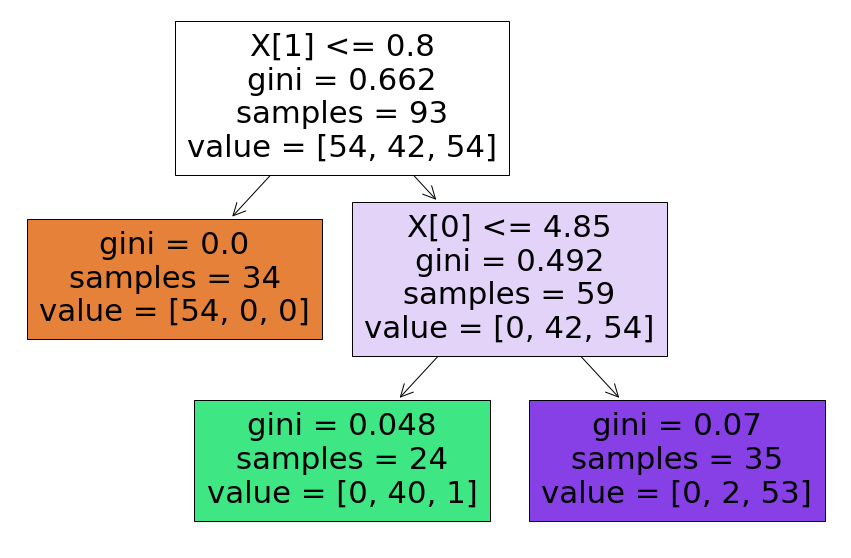

In [36]:
# ultimo arbol
fig = plt.figure(figsize=(15, 10))
plot_tree(RFC.estimators_[99], filled=True)

# Gradient Boosting



In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1)
GBC.fit(X, Y)
predicGBC = GBC.predict(X)
accuracy_score(Y, predic)

In [39]:
GBC.fit(X, Y)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1)

In [40]:
predic = GBC.predict(X)

In [41]:
accuracy_score(Y, predic)

0.9733333333333334

# LDA

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [43]:
lda = LinearDiscriminantAnalysis(n_components=2)


In [44]:
lda.fit(X, Y)

LinearDiscriminantAnalysis(n_components=2)

In [45]:
predic = lda.predict(X)

In [46]:
accuracy_score(Y, predic)

0.96